### MLP based on pytorch lib

In [29]:
import torch
from torch import nn
from d2l import torch as d2l

In [30]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

In [31]:
for X, y in train_iter:
    print(X, y)
    print(X.shape)
    print(y.shape)
    break

tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0039,  ..., 0.0039, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..

In [32]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256

W1 = torch.normal(0, 0.1, size=[num_inputs, num_hiddens], requires_grad=True)
b1 = torch.zeros(num_hiddens, requires_grad=True)
W2 = torch.normal(0, 0.1, size=[num_hiddens, num_outputs], requires_grad=True)
b2 = torch.zeros(num_outputs, requires_grad=True)

params = [W1, b1, W2, b2]

In [33]:
def relu(X):
    a = torch.zeros(X.shape) # must use this tensor to next max method, couldn't pass 0.
    return torch.max(X, a)

tmp = torch.tensor([[1, -1, -2], [-2, 2, 2]])
relu(tmp)

tensor([[1., 0., 0.],
        [0., 2., 2.]])

In [34]:
def net(X):
    h1 = relu(torch.matmul(X.reshape(-1, W1.shape[0]), W1) + b1)
    return torch.matmul(h1, W2) + b2

loss = nn.CrossEntropyLoss()

In [35]:
updater = torch.optim.SGD(params, lr =0.1)

In [36]:
def train():
    for X, y in train_iter:
        y_hat = net(X)
        l = loss(y_hat, y)
        updater.zero_grad()
        l.mean().backward()
        updater.step()

train()

In [37]:
W1, b1

(tensor([[-0.0382,  0.1643, -0.0282,  ..., -0.1390,  0.0787, -0.0051],
         [-0.0618,  0.0782, -0.0214,  ...,  0.0221,  0.0616,  0.0637],
         [ 0.0659, -0.1044,  0.1116,  ...,  0.1767,  0.1149,  0.2068],
         ...,
         [ 0.1467,  0.0061, -0.0749,  ..., -0.0714,  0.1141,  0.0212],
         [-0.0862, -0.0594, -0.1012,  ..., -0.0127,  0.0953,  0.0839],
         [ 0.1571, -0.1099,  0.0719,  ..., -0.1940,  0.1889, -0.0297]],
        requires_grad=True),
 tensor([-1.1612e-02, -6.6219e-04, -7.3992e-03,  1.4403e-02, -1.6735e-04,
         -9.3146e-03,  4.2810e-03,  7.2479e-02, -1.1754e-02,  1.2316e-02,
          1.3809e-02,  2.1836e-03,  6.1089e-03,  2.1208e-03,  8.2931e-03,
         -1.6081e-02, -1.0853e-02,  2.3378e-02,  2.1101e-02,  5.9025e-03,
         -6.3466e-02, -1.4827e-02,  1.7535e-02,  7.0913e-03,  1.0086e-02,
          2.8470e-02,  3.5262e-03,  2.9868e-02, -2.5012e-03,  5.4202e-03,
          2.1868e-02, -1.4181e-02,  2.9643e-02,  2.9768e-02,  1.7703e-02,
          1.

In [38]:
W2, b2

(tensor([[ 0.0008, -0.1804,  0.0943,  ..., -0.0035, -0.0657, -0.0149],
         [ 0.0131, -0.1251,  0.1974,  ..., -0.0658, -0.1212,  0.0584],
         [-0.1299,  0.1107,  0.0645,  ..., -0.0748, -0.0019, -0.0691],
         ...,
         [ 0.1212,  0.0953, -0.1514,  ...,  0.0394,  0.0462, -0.0547],
         [ 0.0204, -0.1642,  0.0817,  ..., -0.2286, -0.1652, -0.1575],
         [-0.0651,  0.0831, -0.0499,  ...,  0.1083, -0.0003,  0.0066]],
        requires_grad=True),
 tensor([ 0.0187, -0.0095, -0.0179,  0.0051, -0.1508,  0.2811,  0.1106, -0.0297,
         -0.0822, -0.1254], requires_grad=True))

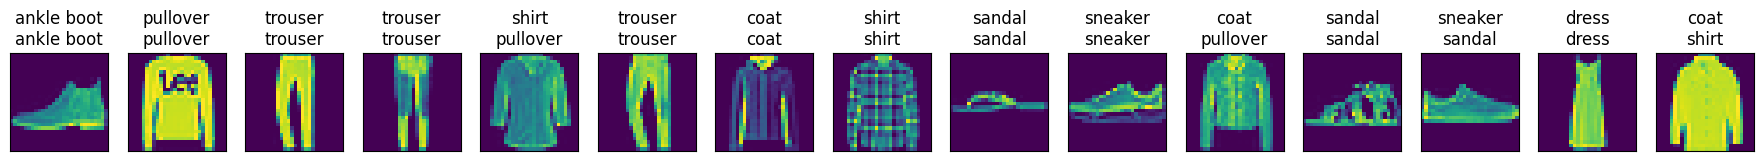

In [39]:
def predict(net, test_iter, n=15):
    for X, y in test_iter:
        trues = d2l.get_fashion_mnist_labels(y)
        preds = d2l.get_fashion_mnist_labels(net(X).argmax(axis=1))
        titles = [true +'\n' + pred for true, pred in zip(trues, preds)]
        d2l.show_images(
            X[0:n].reshape((n, 28, 28)), 1, n, titles=titles[0:n])
        break

predict(net, test_iter)